In [1]:
from bing_image_downloader import downloader
from keras.src.layers import BatchNormalization

/Users/egekibar/GitHub/ai-course/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
downloader.download('handwritten number', limit=50, adult_filter_off=True)

[%] Downloading Images to /Users/egekibar/GitHub/ai-course/Day 9/dataset/handwritten number


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://static.vecteezy.com/system/resources/previews/000/265/840/original/vector-handwritten-numbers-on-white-background-brusk-stroke.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img.freepik.com/premium-vector/free-vector-handwriting-number-collection-brush-lettering-ink-number-set_935409-10.jpg?w=740
[%] File Downloaded !

[%] Downloading Image #3 from https://i.etsystatic.com/22965565/r/il/eb8a29/2586353941/il_1140xN.2586353941_r7vk.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/WJqX_pZ4bwI/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://image.shutterstock.com

# Computer Vision with Deep Learning

In [3]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist # el yazısı rakamları tanıma

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

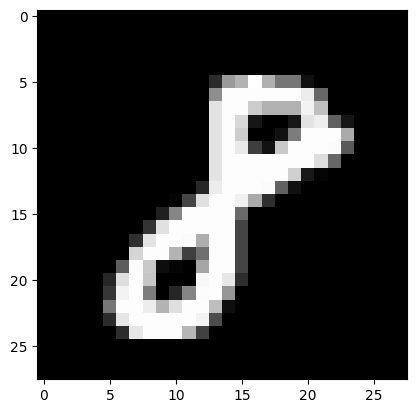

In [8]:
plt.imshow(train_images[31], cmap='gray')

In [9]:
train_labels[4000]

7

Normalize Data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

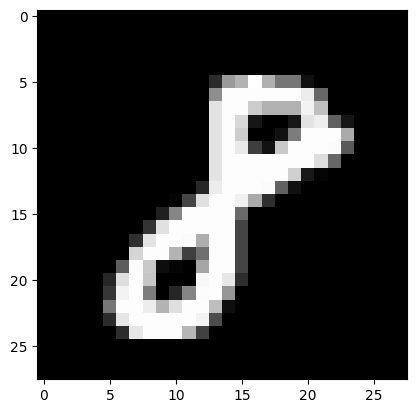

In [11]:
plt.imshow(train_images[31], cmap='gray')

Convolutional Neural Networks - CNNs - Image Classification

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [13]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(Dense(10)) # 10 farklı cevap 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

/Users/egekibar/GitHub/ai-course/venv/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.fit(train_images, train_labels, epochs=10, validation_split=.10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8754 - loss: 0.4415 - val_accuracy: 0.9747 - val_loss: 0.0896
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9735 - loss: 0.0912 - val_accuracy: 0.9782 - val_loss: 0.0732
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0629 - val_accuracy: 0.9833 - val_loss: 0.0615
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9857 - loss: 0.0477 - val_accuracy: 0.9843 - val_loss: 0.0534
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0393 - val_accuracy: 0.9857 - val_loss: 0.0530
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9892 - loss: 0.0351 - val_accuracy: 0.9852 - val_loss: 0.0539
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9920 - loss: 0.0279 - val_accuracy: 0.9835 - val_loss: 0.0601
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9925 - loss: 0.0241 - 

In [15]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0726


In [16]:
accuracy

0.9830999970436096

In [17]:
model.save("my_model.h5")

In [18]:
# df = tf.keras.utils.image_dataset_from_directory('dataset') # toplu import 

In [23]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(60))
model.add(Dropout(.25))
model.add(Dense(10)) # 10 farklı cevap 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

Başarı sayısını arttırma teknikleri;
- Layer sayısını arttır
- Neuron Sayısını arttır
- Dropout Overfitingi engeller daha iyi öğrenmeye olanak sağlar